In [1]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sn
#pca = decomposition.PCA()

In [2]:
db = 'adult.data'
meta = 'adult.names'
cnames = []
with open(meta) as file:
    for line in (file.readlines()[-14:]):
        cnames.append(line.split(':')[0])
cnames.append("salary")
df = pd.read_csv(db, index_col = False, names = cnames, sep = ', ', engine = 'python')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


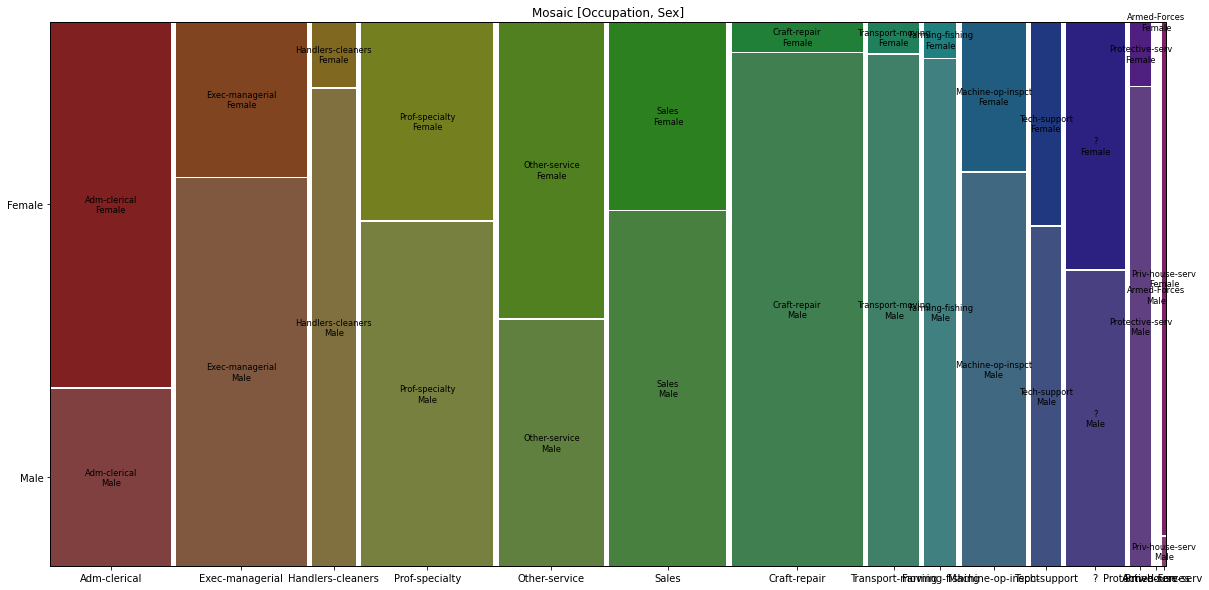

In [3]:
plt.rcParams["figure.figsize"]=(20,10)
mosaic(df, ['occupation', 'sex'])
plt.title("Mosaic [Occupation, Sex]")
plt.show()

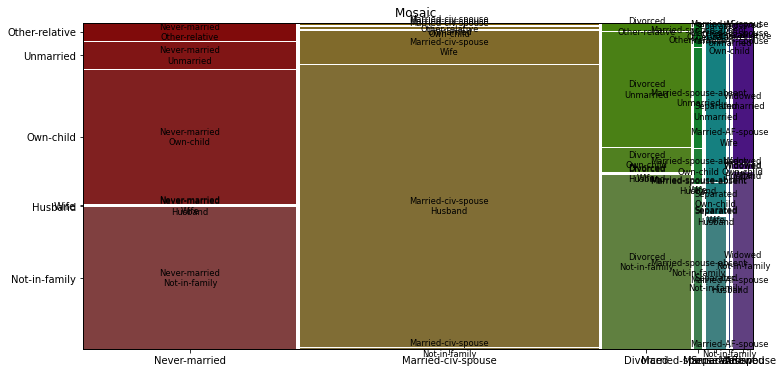

In [8]:
plt.rcParams["figure.figsize"]=(12,6)
mosaic(df,['marital-status','relationship'])
plt.title("Mosaic ")
plt.show()

In [9]:
df[df['age'] <= 25]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
31,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,203715,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32535,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K


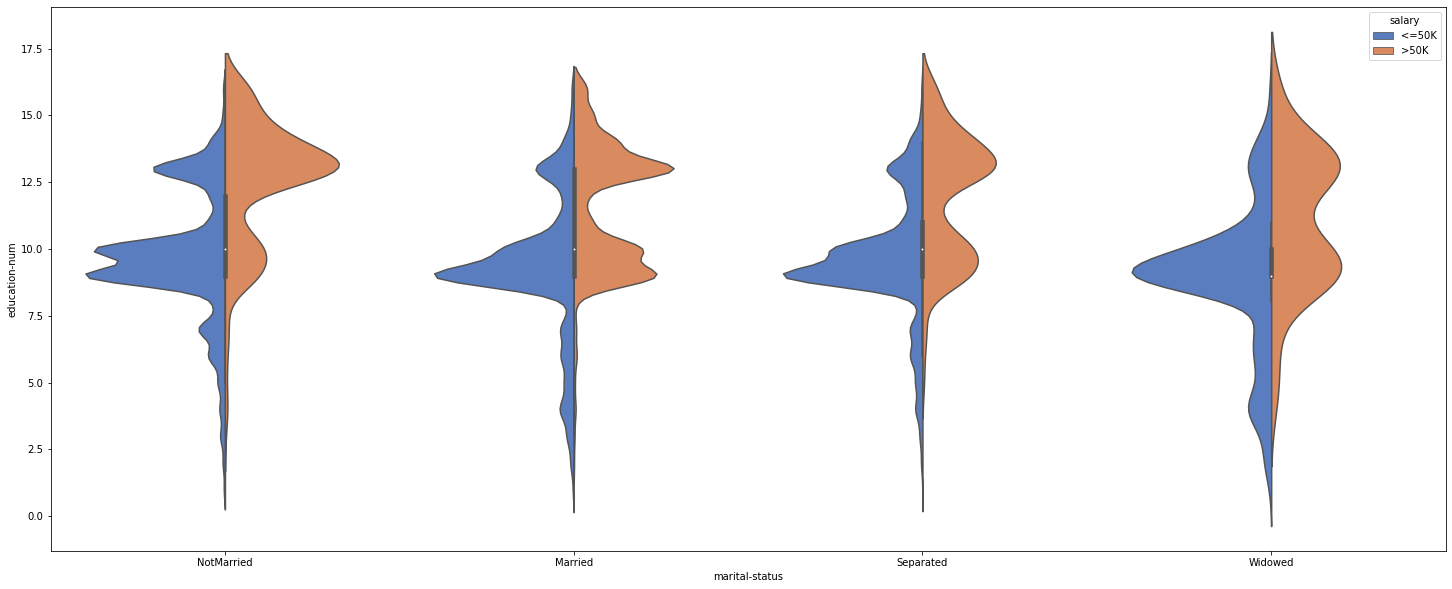

In [10]:
# pie, line, bar,  parallel coor, scatter, 
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)
a4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sn.violinplot(x="marital-status", y="education-num", hue="salary",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax



#plt.pie(df1, shadow=False)
#plt.axis('equal') 
#plt.show()

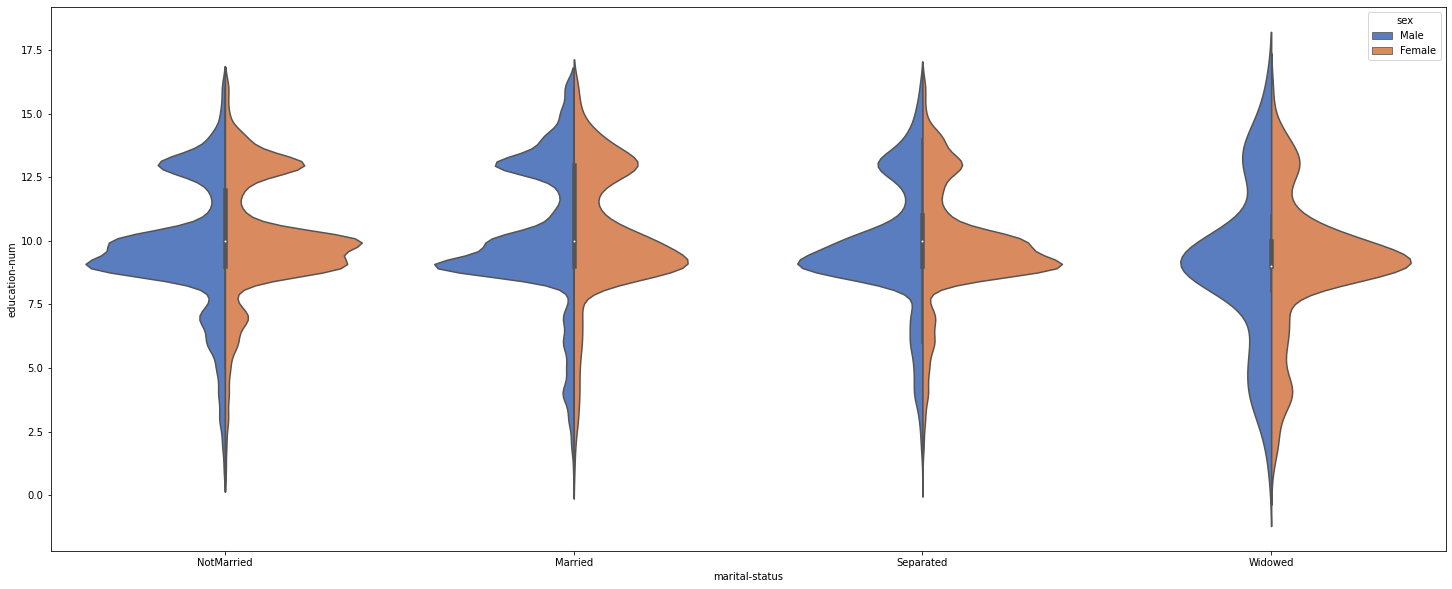

In [11]:
a4_dims = (25, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sn.violinplot(x="marital-status", y="education-num", hue="sex",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax


/Users/wingman2.0/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/wingman2.0/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/wingman2.0/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/wingman2.0/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/wingman2.0/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/User

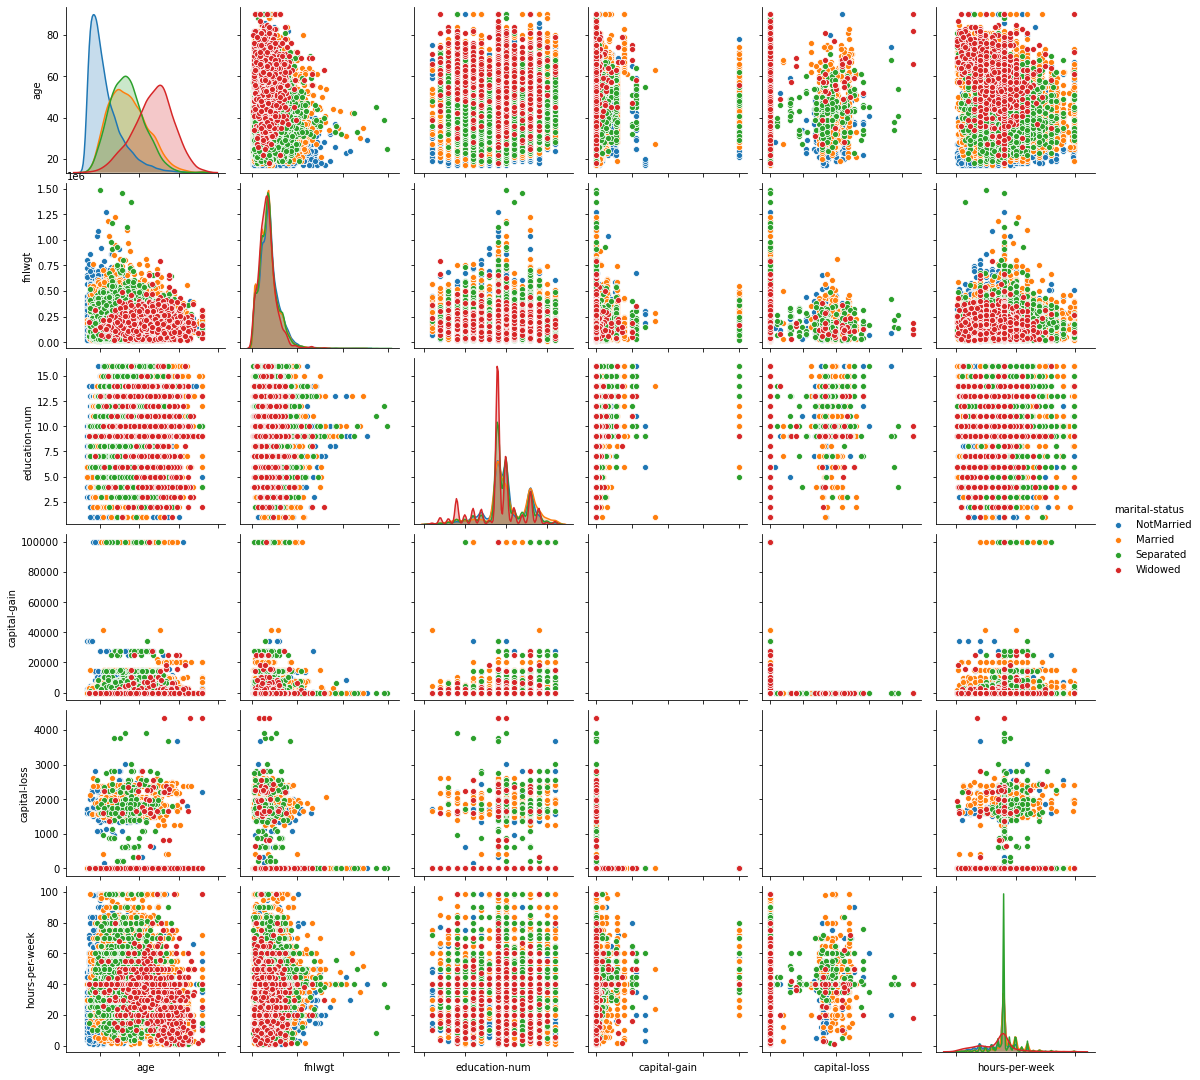

In [12]:
pp = sn.pairplot(df, hue = 'marital-status' )
pp.set(xticklabels=[])

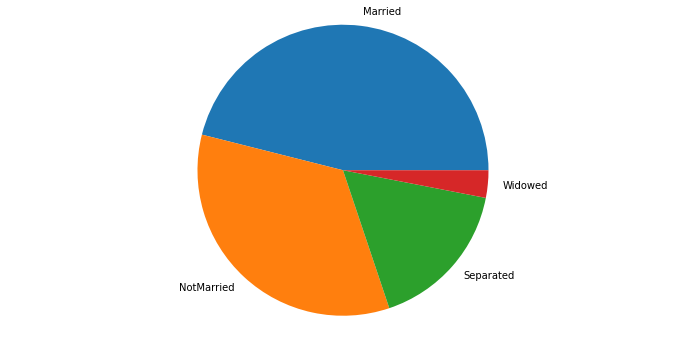

In [13]:

plt.pie(df['marital-status'].value_counts(), labels=df['marital-status'].value_counts().index, shadow=False)
plt.axis('equal') 
plt.show()

In [14]:
d1 = df[df['salary']=='>50K']
d2 = df[df['salary']=='<=50K']
d1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,NotMarried,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


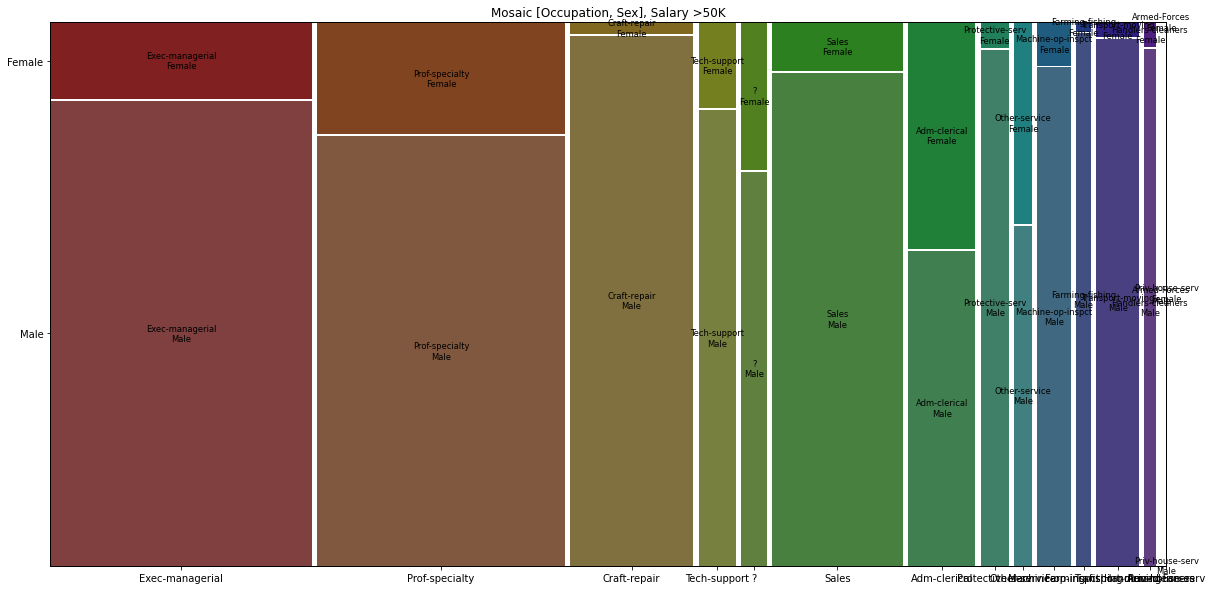

In [15]:
plt.rcParams["figure.figsize"]=(20,10)
mosaic(d1, ['occupation', 'sex'])
plt.title("Mosaic [Occupation, Sex], Salary >50K")
plt.show()

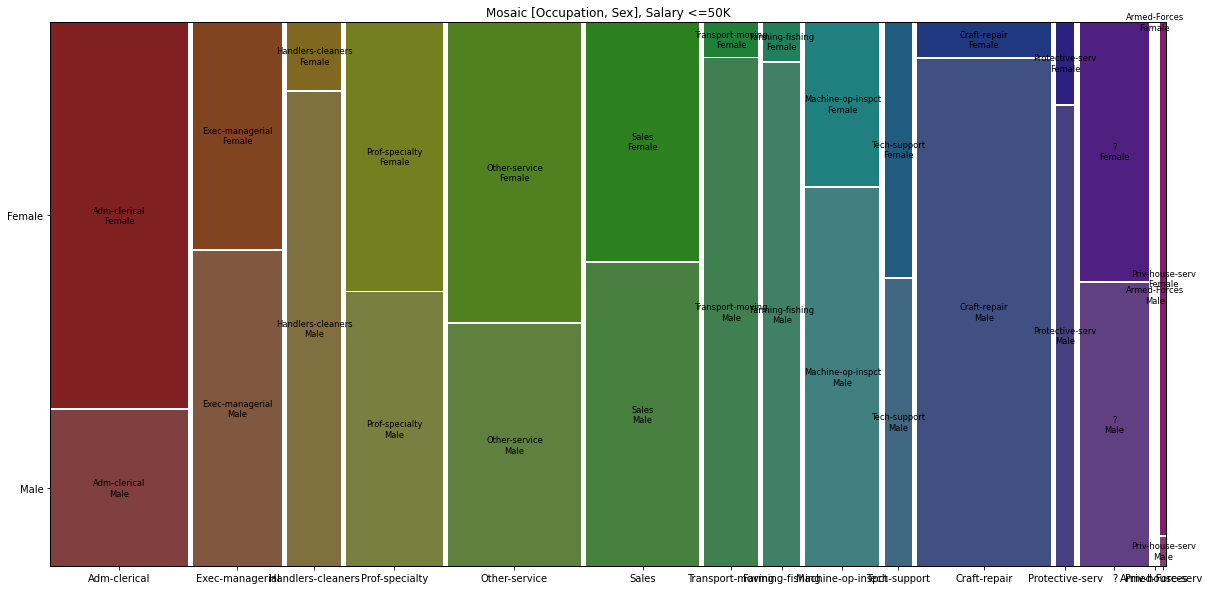

In [16]:
plt.rcParams["figure.figsize"]=(20,10)
mosaic(d2, ['occupation', 'sex'])
plt.title("Mosaic [Occupation, Sex], Salary <=50K")
plt.show()

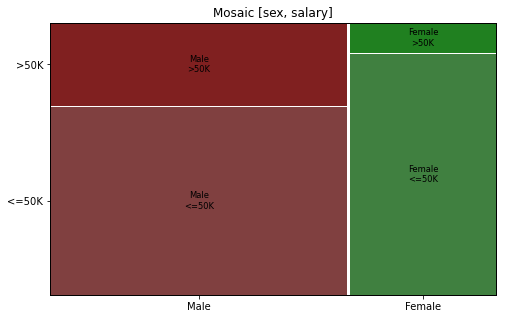

In [17]:
plt.rcParams["figure.figsize"]=(8,5)
mosaic(df, ['sex', 'salary'])
plt.title("Mosaic [sex, salary]")
plt.show()


In [18]:
df[['education-num','education']]

,education-num,education
0,13,Bachelors
1,13,Bachelors
2,9,HS-grad
3,7,11th
4,13,Bachelors
...,...,...
32556,12,Assoc-acdm
32557,9,HS-grad
32558,9,HS-grad
32559,9,HS-grad


In [19]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [20]:
df['New_ID'] = range(len(df))
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,New_ID
0,39,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,3
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32556
32557,40,Private,154374,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32557
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32558
32559,22,Private,201490,HS-grad,9,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,32559


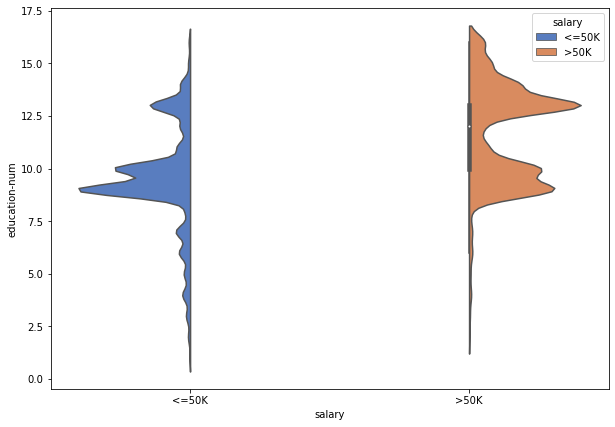

In [21]:
a4_dims = (10, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sn.violinplot(x='salary', y="education-num", hue="salary",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [22]:
#df['education-num'] = df['education-num'].apply()


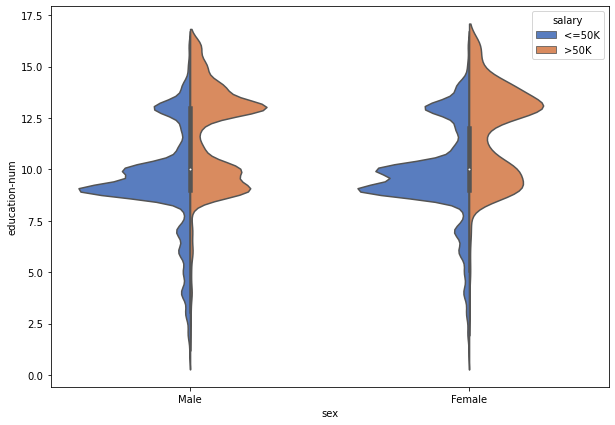

In [23]:
a4_dims = (10, 7)
fig, ax = pyplot.subplots(figsize=a4_dims)
#sn.set_style("ticks",{"xtick.major.size":8,"ytick.major.size":8})
ax.set(xticks=df['education-num'][1::16])
ax = sn.violinplot(x="sex", y="education-num", hue="salary",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax


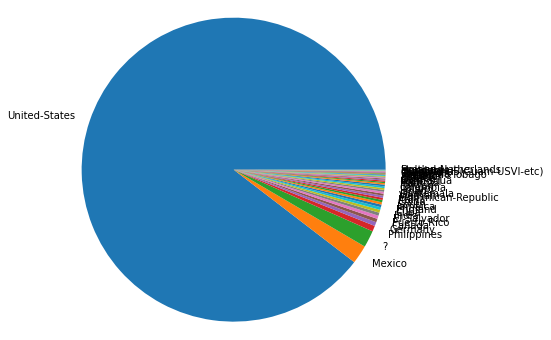

In [24]:
plt.rcParams["figure.figsize"]=(6,6)
plt.pie(df['native-country'].value_counts(), labels=df['native-country'].value_counts().index, shadow=False)
plt.axis('equal') 

plt.show()